# Decision Trees for Regression

We'll use a data set for predicting the quality (log-price) of Bordeaux wines.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
data_dir = "https://dlsun.github.io/pods/data/"
bordeaux_df = pd.read_csv(data_dir + "bordeaux.csv",
                          index_col="year")

# Split the data into training and test sets.
bordeaux_train = bordeaux_df.loc[:1980].copy()
bordeaux_test = bordeaux_df.loc[1981:].copy()

# Log transform the target.
bordeaux_train["log(price)"] = np.log(bordeaux_train["price"])
bordeaux_train.head()

,price,summer,har,sep,win,age,log(price)
year,,,,,,,
1952,37.0,17.1,160,14.3,600,40,3.610918
1953,63.0,16.7,80,17.3,690,39,4.143135
1955,45.0,17.1,130,16.8,502,37,3.806662
1957,22.0,16.1,110,16.2,420,35,3.091042
1958,18.0,16.4,187,19.1,582,34,2.890372


Let's focus on just two predictors for now: winter rainfall (**win**) and average summer temperature (**summer**). Let's plot the training data, using a color gradient to represent the target (**log(price)**).

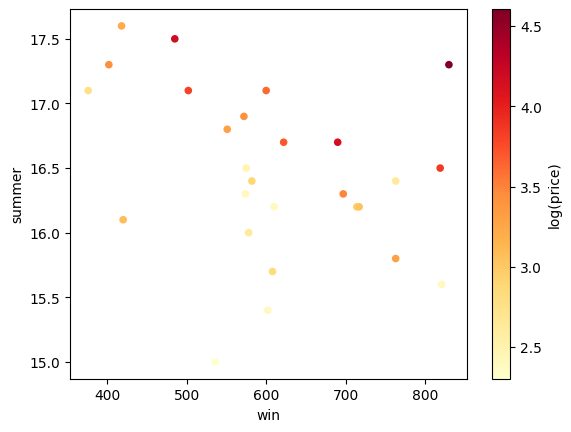

In [ ]:
import matplotlib.cm as cm

bordeaux_train.plot.scatter(x="win", y="summer", c="log(price)",
                            cmap=cm.YlOrRd);

## Decision trees in scikit-learn


In [ ]:
X_train = bordeaux_train[["win", "summer"]]
y_train = bordeaux_train["log(price)"]

In [ ]:
dt = DecisionTreeRegressor(max_depth=2)

dt

DecisionTreeRegressor(max_depth=2)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
dt.predict(X_train)

array([3.49095562, 4.37415246, 3.49095562, 2.60387361, 2.60387361,
       3.49095562, 3.09548658, 4.37415246, 3.09548658, 2.60387361,
       3.49095562, 2.60387361, 3.09548658, 3.09548658, 2.60387361,
       2.60387361, 3.49095562, 3.49095562, 2.60387361, 3.49095562,
       2.60387361, 3.49095562, 3.49095562, 3.09548658, 3.09548658,
       3.09548658, 2.60387361])

[Text(0.5, 0.8333333333333334, 'x[1] <= 16.6\nsquared_error = 0.379\nsamples = 27\nvalue = 3.158'),
 Text(0.25, 0.5, 'x[0] <= 653.5\nsquared_error = 0.19\nsamples = 16\nvalue = 2.819'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.067\nsamples = 9\nvalue = 2.604'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.213\nsamples = 7\nvalue = 3.095'),
 Text(0.75, 0.5, 'x[0] <= 656.0\nsquared_error = 0.242\nsamples = 11\nvalue = 3.652'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.142\nsamples = 9\nvalue = 3.491'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.053\nsamples = 2\nvalue = 4.374')]

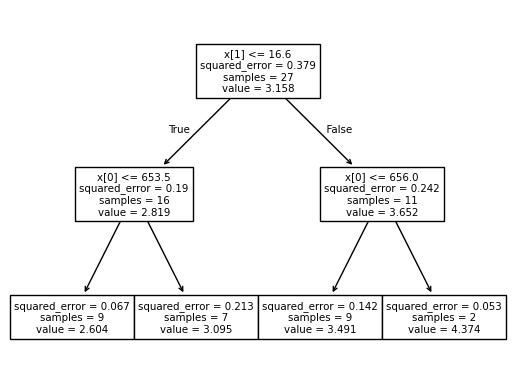

In [ ]:
from sklearn.tree import plot_tree

plot_tree(dt)

[Text(0.5, 0.8333333333333334, 'summer <= 16.6\nsquared_error = 0.379\nsamples = 27\nvalue = 3.158'),
 Text(0.25, 0.5, 'win <= 653.5\nsquared_error = 0.19\nsamples = 16\nvalue = 2.819'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.067\nsamples = 9\nvalue = 2.604'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.213\nsamples = 7\nvalue = 3.095'),
 Text(0.75, 0.5, 'win <= 656.0\nsquared_error = 0.242\nsamples = 11\nvalue = 3.652'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.142\nsamples = 9\nvalue = 3.491'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.053\nsamples = 2\nvalue = 4.374')]

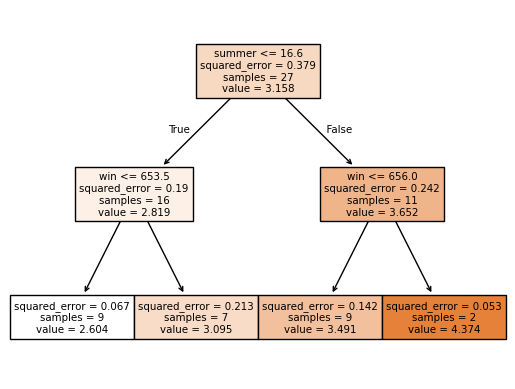

In [ ]:
plot_tree(dt, feature_names=["win", "summer"], filled=True)

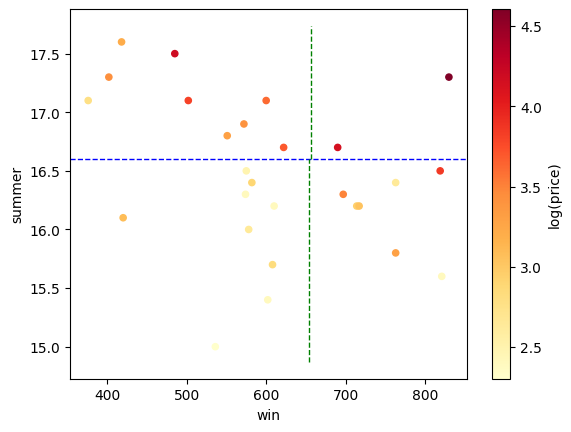

In [ ]:
import matplotlib.pyplot as plt

ax = bordeaux_train.plot.scatter(
    x="win",
    y="summer",
    c="log(price)",
    cmap=cm.YlOrRd
)

# Horizontal line at y = 16.6
plt.axhline(y=16.6, color='blue', linestyle='--', linewidth=1)

# Vertical line at x = 653.5 (from y=0 to y=16.6)
plt.vlines(x=653.5, ymin=ax.get_ylim()[0], ymax=16.6, color='green', linestyle='--', linewidth=1)

# Vertical line at x = 656 (from y=16.6 to top of plot)
plt.vlines(x=656, ymin=16.6, ymax=ax.get_ylim()[1], color='green', linestyle='--', linewidth=1)



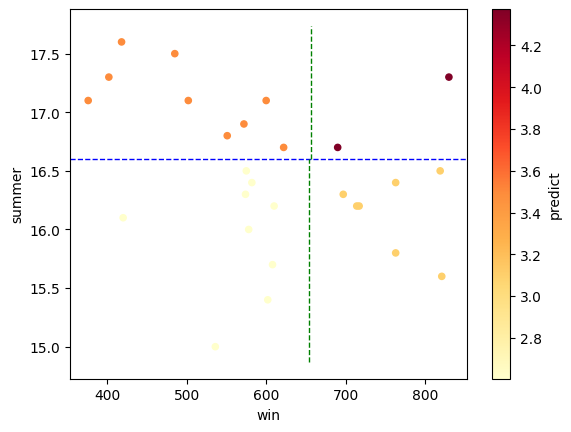

In [ ]:
bordeaux_train["predict"] = dt.predict(X_train)

ax = bordeaux_train.plot.scatter(
    x="win",
    y="summer",
    c="predict",
    cmap=cm.YlOrRd
)

# Horizontal line at y = 16.6
plt.axhline(y=16.6, color='blue', linestyle='--', linewidth=1)

# Vertical line at x = 653.5 (from y=0 to y=16.6)
plt.vlines(x=653.5, ymin=ax.get_ylim()[0], ymax=16.6, color='green', linestyle='--', linewidth=1)

# Vertical line at x = 656 (from y=16.6 to top of plot)
plt.vlines(x=656, ymin=16.6, ymax=ax.get_ylim()[1], color='green', linestyle='--', linewidth=1)

In [ ]:
dt_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeRegressor(max_depth=2))]
)

dt_pipeline

Pipeline(steps=[('standardize', StandardScaler()),
                ('decision_tree', DecisionTreeRegressor(max_depth=2))])

In [ ]:
dt_pipeline.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('decision_tree', DecisionTreeRegressor(max_depth=2))])

In [ ]:
dt_pipeline.predict(X=X_train)

array([3.49095562, 4.37415246, 3.49095562, 2.60387361, 2.60387361,
       3.49095562, 3.09548658, 4.37415246, 3.09548658, 2.60387361,
       3.49095562, 2.60387361, 3.09548658, 3.09548658, 2.60387361,
       2.60387361, 3.49095562, 3.49095562, 2.60387361, 3.49095562,
       2.60387361, 3.49095562, 3.49095562, 3.09548658, 3.09548658,
       3.09548658, 2.60387361])

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.203\nsquared_error = 0.379\nsamples = 27\nvalue = 3.158'),
 Text(0.25, 0.5, 'x[0] <= 0.356\nsquared_error = 0.19\nsamples = 16\nvalue = 2.819'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.067\nsamples = 9\nvalue = 2.604'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.213\nsamples = 7\nvalue = 3.095'),
 Text(0.75, 0.5, 'x[0] <= 0.376\nsquared_error = 0.242\nsamples = 11\nvalue = 3.652'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.142\nsamples = 9\nvalue = 3.491'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.053\nsamples = 2\nvalue = 4.374')]

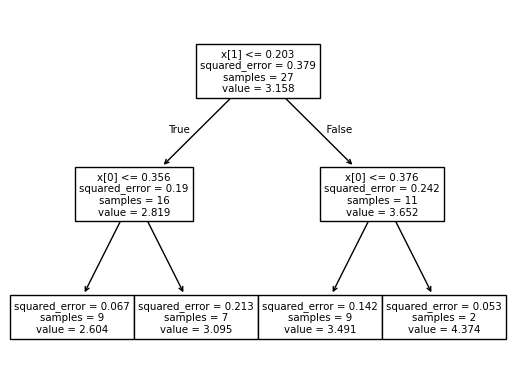

In [ ]:
    # Access the Decision Tree estimator by its name in the pipeline
    decision_tree_estimator = dt_pipeline.named_steps['decision_tree']

    # Plot the decision tree
    plot_tree(decision_tree_estimator)

In [ ]:
dt = DecisionTreeRegressor(max_depth=3)

dt

DecisionTreeRegressor(max_depth=3)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
dt.predict(X_train)

array([3.58075148, 4.14313473, 3.58075148, 3.09104245, 2.5429775 ,
       3.58075148, 2.96970974, 4.60517019, 2.96970974, 2.5429775 ,
       3.58075148, 2.5429775 , 3.8501476 , 2.96970974, 2.5429775 ,
       2.5429775 , 3.58075148, 3.58075148, 2.5429775 , 2.77258872,
       2.5429775 , 3.58075148, 3.58075148, 2.96970974, 2.96970974,
       2.96970974, 2.5429775 ])

[Text(0.5, 0.875, 'summer <= 16.6\nsquared_error = 0.379\nsamples = 27\nvalue = 3.158'),
 Text(0.25, 0.625, 'win <= 653.5\nsquared_error = 0.19\nsamples = 16\nvalue = 2.819'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'win <= 478.0\nsquared_error = 0.067\nsamples = 9\nvalue = 2.604'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 3.091'),
 Text(0.1875, 0.125, 'squared_error = 0.042\nsamples = 8\nvalue = 2.543'),
 Text(0.375, 0.375, 'summer <= 16.45\nsquared_error = 0.213\nsamples = 7\nvalue = 3.095'),
 Text(0.3125, 0.125, 'squared_error = 0.138\nsamples = 6\nvalue = 2.97'),
 Text(0.4375, 0.125, 'squared_error = -0.0\nsamples = 1\nvalue = 3.85'),
 Text(0.75, 0.625, 'win <= 656.0\nsquared_error = 0.242\nsamples = 11\nvalue = 3.652'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'win <= 389.0\nsquared_error = 0.142\nsamples = 9\nvalue = 3.491'),
 Text(0.5625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 2.773'),
 Text(0.6875, 0.125, 'squared_error = 0.

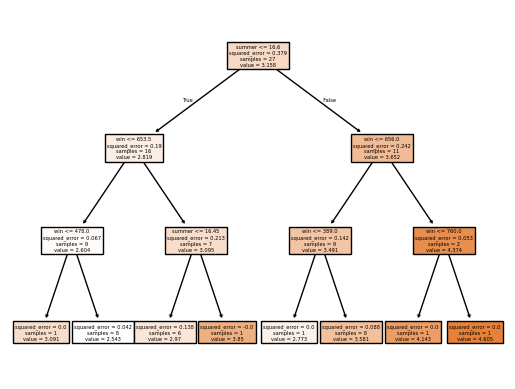

In [ ]:
plot_tree(dt, feature_names=["win", "summer"], filled=True)

In [ ]:
dt = DecisionTreeRegressor(ccp_alpha = 0.1)

dt

DecisionTreeRegressor(ccp_alpha=0.1)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.1)

In [ ]:
dt.predict(X_train)

array([3.65153686, 3.65153686, 3.65153686, 2.81895428, 2.81895428,
       3.65153686, 2.81895428, 3.65153686, 2.81895428, 2.81895428,
       3.65153686, 2.81895428, 2.81895428, 2.81895428, 2.81895428,
       2.81895428, 3.65153686, 3.65153686, 2.81895428, 3.65153686,
       2.81895428, 3.65153686, 3.65153686, 2.81895428, 2.81895428,
       2.81895428, 2.81895428])

[Text(0.5, 0.75, 'summer <= 16.6\nsquared_error = 0.379\nsamples = 27\nvalue = 3.158'),
 Text(0.25, 0.25, 'squared_error = 0.19\nsamples = 16\nvalue = 2.819'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 0.242\nsamples = 11\nvalue = 3.652'),
 Text(0.625, 0.5, '  False')]

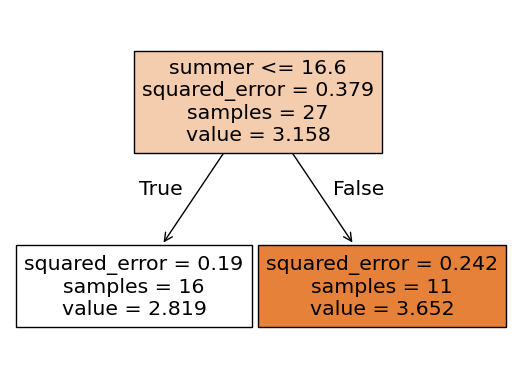

In [ ]:
plot_tree(dt, feature_names=["win", "summer"], filled=True)